In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt


### Numerical solution

The numerical solution is done by:
1. collecting data of the input (base joint swing range) and output (ball travel distance)
2. using linear fit to find the parameters
3. using the measured distance to find the required base swing range (rad). The wrist swing range is always 0.785 * base swing range

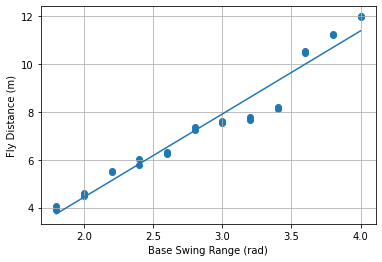

slope:  3.4787587412587415
b:  -2.526317016317011


In [32]:
#swing range
inputs = np.linspace(1.8, 4.0, 12)
inputs = np.repeat(inputs, 2)

#fly distance
outputs = np.array([3.92, 4.05, 4.63,4.50, 5.49, 5.55, 6.02, 5.77, 6.23, 6.31, 7.37,7.25, 7.60, 7.53, 7.78, 7.67, 8.22, 8.14, 10.56, 10.47, 11.2, 11.27, 12.0,11.96])

m, b = np.polyfit(inputs, outputs, 1)



plt.scatter(inputs, outputs)
plt.plot(inputs, m*inputs + b)
plt.grid()

plt.xlabel("Base Swing Range (rad)")
plt.ylabel("Fly Distance (m)")
plt.show()


print("slope: ", m)
print("b: ", b)

### Analytical solution (with a little numerical trick)

Similar to the numerical solution, the input is the base joint rotation range (rad) and the output is the golf ball travel distance in the air. Here is the derivation.

Point mass projectile range equation (assuming the golf ball is a point mass and the golf club angle is the initial angle):
\begin{equation}
R = \frac{v_{i}^{2}sin(2\theta_{i})}{g}
\end{equation}

Move the variables, we get
\begin{equation}
v_{ball} = v_{i} = \sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}


The next part is a little bit unrealistic due to the strange behavior of the physics engine. The golf club does not lose any velocity after hitting the golf ball. Even when I set the ball mass to be 100 kg, the golf club will still keep the same velocity after hitting the 100 kg golf ball. This part deverses a further investigation.

For now in this simulation, let's assume a relationship between the golf club momentum and the golf ball momentum governed by a constant k, which describes the energy gain in the system due to this strange behavior


\begin{equation}
m_{club}v_{club} = km_{ball}v_{ball}
\end{equation}

\begin{equation}
v_{club} = \frac{km_{ball}}{m_{club}}v_{ball}
\end{equation}
\begin{equation}
v_{club} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

the golf club velocity is determined by the base joint linear velocity $v_{base}$, wrist joint linear velocity $v_{end}$, and the mobile platform velocity, which is set to be always 1 m/s in this case.

\begin{equation}
1.0 + v_{base} + v_{end} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

Turn in to angular velocity

\begin{equation}
1.0 + \omega_{base}r_{base} + \omega_{end}r_{end} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

The input (base joint rotation angle) will come in here. The swing duration t is always set to 1.0s, so the rotation angle is $\phi_{base} = \omega_{base}t$

\begin{equation}
1.0 + \frac{\phi_{base}}{t}r_{base} + \frac{\phi_{end}}{t}r_{end} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

\begin{equation}
1.0 + \phi_{base}r_{base} + \phi_{end}r_{end} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

For simplicity, we can set the wrist rotation angle depend on the base joint angle which is a valid assumption in a human golf swing.

\begin{equation}
\phi_{end} = 0.785\phi_{base}
\end{equation}

\begin{equation}
1.0 + \phi_{base}r_{base} + 0.785\phi_{base}r_{end} = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}}
\end{equation}

\begin{equation}
\phi_{base}(r_{base} + 0.785r_{end}) = \frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}} - 1
\end{equation}


Moving the variables around

\begin{equation}
\phi_{base} = \frac{\frac{km_{ball}}{m_{club}}\sqrt{\frac{Rg}{sin(2\theta_{i})}} - 1}{r_{base} + 0.785r_{end}}
\end{equation}

We now have the relationship between the required base joint rotation angle in the swing and the distance that the ball should travel.

However, we still don't know the $k$ constant which describes the strange behavior from physics engine. What we will do here is to plot the analytical solution curve and the numerical solution curve. We will then hand tune the $k$ value to find a analytical curve that matches the numercial curve.

Moving the variables around again to get distance based on different rotation range.
\begin{equation}
R = \frac{((\phi_{base}(r_{base} + 0.785r_{end}) + 1)\frac{m_{club}}{km_{ball}})^{2}sin(2\theta_{i})}{g}
\end{equation}

The following code shows the result curves. When $k = 5.66985$, the analytical solution is closed to the numercial solution.

[ 3.56796355  3.56796355  4.13820042  4.13820042  4.75069132  4.75069132
  5.40543624  5.40543624  6.10243518  6.10243518  6.84168815  6.84168815
  7.62319515  7.62319515  8.44695617  8.44695617  9.31297121  9.31297121
 10.22124028 10.22124028 11.17176338 11.17176338 12.16454049 12.16454049]


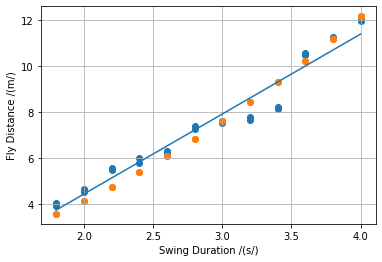

k:  5.669859931780245


In [33]:
r_end = 0.605
arc_base = 3.6
r_base = 0.402 + 0.3745

energy_loss = 0.1763712
mass_ratio = energy_loss*(0.5/0.04593)

angle_i = 0.556

R = ((((inputs * (0.785*r_end + r_base) + 1)*mass_ratio)**2)*math.sin(2*angle_i))/9.8



print(R)

plt.scatter(inputs, outputs)
plt.scatter(inputs, R)
plt.plot(inputs, m*inputs + b)
plt.grid()

plt.xlabel("Base Swing Range (rad)")
plt.ylabel("Fly Distance (m)")
plt.show()


print("k: ", 1.0/energy_loss)
